In [1]:
# from lfs_tree import *
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
import pydot
import networkx as nx
from string import Template
import pandas as pd
import glob
import pydot
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
import pickle
from IPython.display import Image, display

In [2]:
def view_pydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

def show_trees(directory):
    print(directory)
    treefiles = glob.glob(f'{directory}*tree_*')
#     print(treefiles)
    num_trees_per_strat = len(treefiles)/2
#     for i in range(0, int(num_trees_per_strat)):
    for f in glob.glob(f'{directory}*tree_*'):
        file = open(f)
        dot_string = file.read()
        print(f)
        graph = pydot.graph_from_dot_data(dot_string)[0]
        view_pydot(graph)
        print('\n')
        
def show_stats(directory):
    f = glob.glob(f'{directory}*experiment_stats')[0]
#     print(f)
#                                 experiment_stats
#     file = open('../intro_example/experiment_stats')
    df = pd.read_csv(f)
#     print(df)
    return df

def show_user_inputs(directory):
    f = glob.glob(f'{directory}sampled*')[0]
    df = pd.read_csv(f)
    print(list(df))
    return df[['text', 'expected_label', 'model_pred', 'id']].sort_values(by=['text'])

def view_repair_bookkeeping_results(directory):
    print(glob.glob(f'{directory}*book_keeping_dict*'))
    f = glob.glob(f'{directory}*book_keeping_dict*')[0]
#               20230921002723fix_book_keeping_dict.pkl
    with open(f, 'rb') as file:
        # Load the object from the file
        loaded_object = pickle.load(file)
#         print("Object loaded successfully:")
#         print(loaded_object)
    return loaded_object

In [16]:
files = glob.glob('../../rbbm_src/experiment_results_folders/dc_test_case1004/*')
print(files)
df = pd.concat([show_stats(f+'/') for f in files])

['../../rbbm_src/experiment_results_folders/dc_test_case1004/20231004215011', '../../rbbm_src/experiment_results_folders/dc_test_case1004/20231004215104', '../../rbbm_src/experiment_results_folders/dc_test_case1004/20231004215139']


In [19]:
df_input = pd.read_csv('../../rbbm_src/experiment_results_folders/dc_test_case1004/20231004215011/user_input.csv')

In [20]:
df_input

,fname,lname,gender,areacode,phone,city,state,zip,maritalstatus,haschild,salary,rate,singleexemp,marriedexemp,childexemp,_tid_,is_dirty,type
0,Rayond,Keronen,M,661,1000352,CASTAIC,CA,91384,M,N,48500,9.300000,0,174,0,19,False,complaint
1,Knud,Caneve,M,225,1001872,SAINT AMANT,LA,70774,M,N,3000,2.000000,0,9000,0,138,False,complaint
2,Balas,Hutflesz,F,562,1008012,SIMI VALLEY,CA,93094,M,N,54500,9.300000,0,174,0,189,False,complaint
3,Wendie,Molyneaux,F,406,1021117,BUSBY,MT,59016,S,Y,34500,6.900000,1900,0,1900,325,False,complaint
4,Zubin,Michailidis,M,501,1005486,CLARKRIDGE,AR,72623,S,Y,5000,1.382694,20,0,20,446,False,complaint
5,Peter,Gusev,F,505,1001914,SANTO DOMINGO PUEBLO,NM,87052,M,N,35000,5.300000,0,6600,0,531,False,complaint
6,Roya,Don,F,978,1001907,BOLTON,MA,1740,M,N,33500,5.300000,0,7150,0,582,False,complaint
7,Takaichi,Dart,M,601,1000789,TOOMSUBA,MS,39364,M,N,31500,5.000000,0,12000,0,687,False,complaint
8,Mendel,Campagnoni,F,773,1000142,JERSEYVILLE,IL,62052,S,Y,35000,3.000000,2000,0,2000,723,False,complaint
9,Madhusudhana,Ruamviboonsuk,F,302,1009469,WILMINGTON,DE,19890,S,Y,82000,5.950000,110,0,110,775,False,complaint


In [17]:
df

,strat,semantic_version,prefilter_runtime,rbbm_runtime,bbox_runtime,avg_tree_size_increase,user_input_size,complaint_ratio,num_complaints,num_confirmations,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,prev_signaled_cnt,new_signaled_cnt,num_functions,deletion_factor,post_fix_num_funcs,num_of_funcs_processed_by_algo,complaint_reached_max,confirm_reached_max,lf_source,retrain_after_percent,retrain_accuracy_thresh,load_funcs_from_pickle,pre_deletion_threshold
0,optimal,ind,0.08,0.043,6.530,0.285714,40,0.5,20,20,0.632,0.00,1.000,0.632,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lf_only,0.0
0,information_gain,ind,0.08,0.431,2.721,0.285714,40,0.5,20,20,0.513,1.00,0.818,0.932,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lf_only,0.0
0,naive,ind,0.08,0.035,3.477,2.857143,40,0.5,20,20,0.615,0.85,1.000,0.899,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lf_only,0.0


../../rbbm_src/experiment_results_folders/dc_test_case1004/20231004215011/
../../rbbm_src/experiment_results_folders/dc_test_case1004/20231004215011/tree_1_dot_file


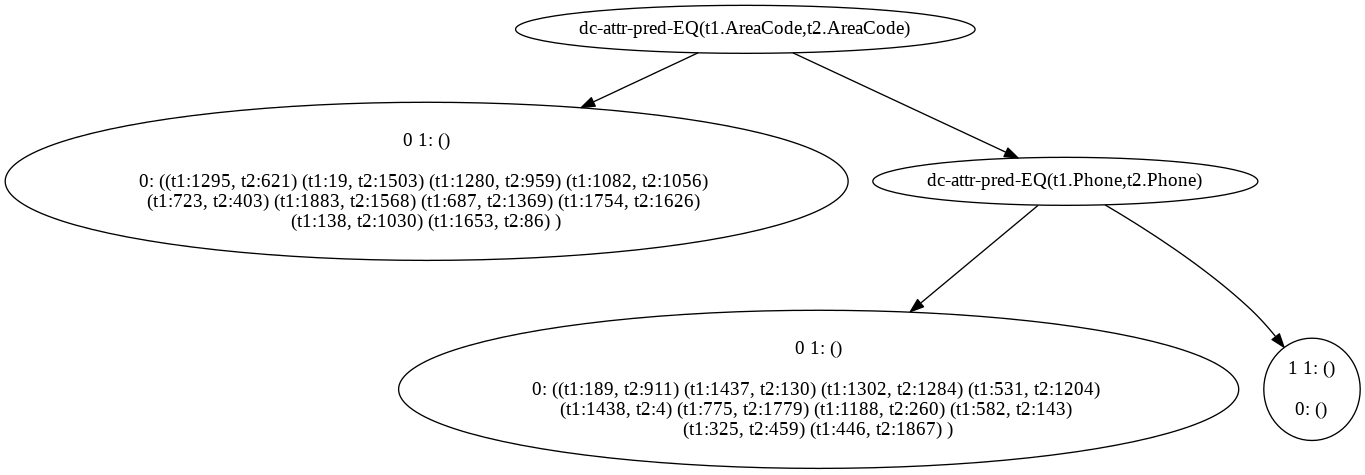



../../rbbm_src/experiment_results_folders/dc_test_case1004/20231004215011/tree_2_dot_file


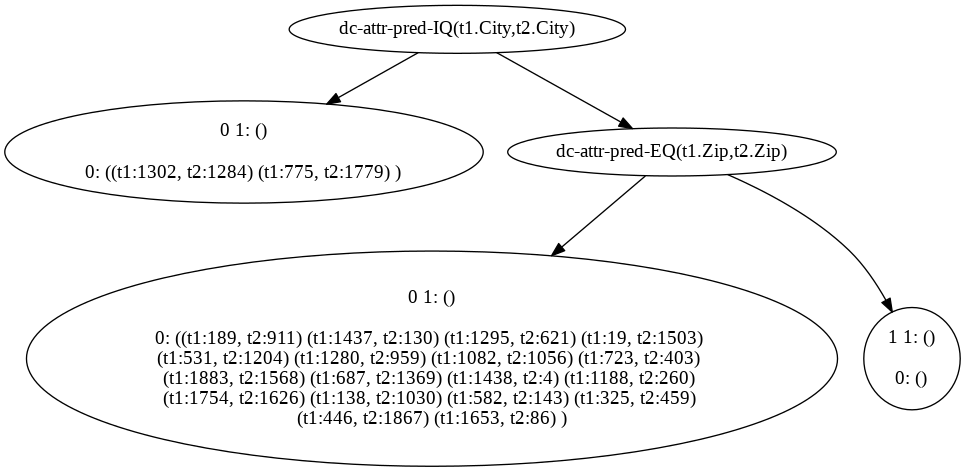



../../rbbm_src/experiment_results_folders/dc_test_case1004/20231004215011/tree_3_dot_file


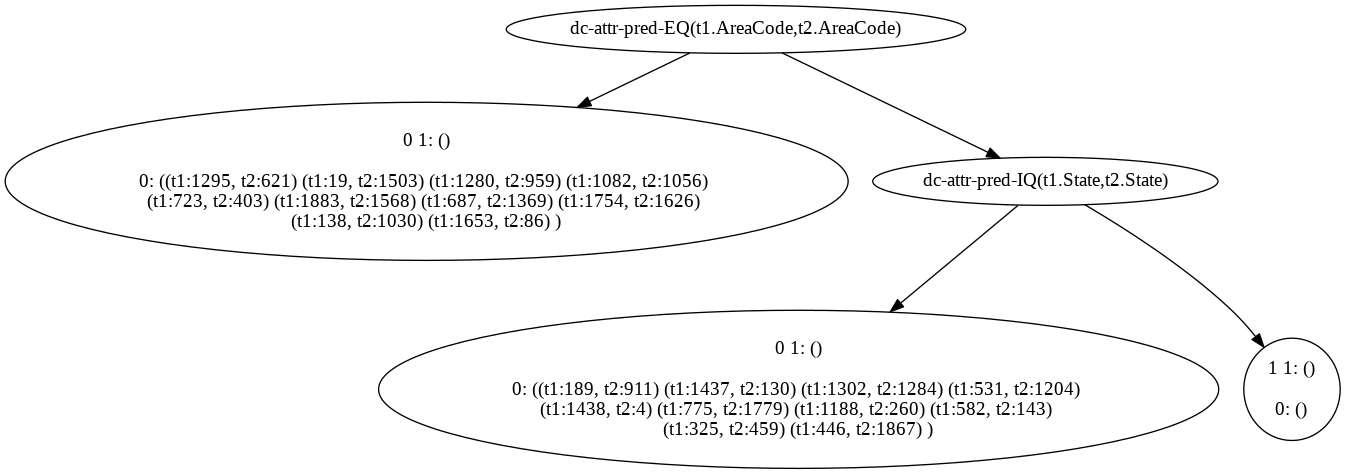



../../rbbm_src/experiment_results_folders/dc_test_case1004/20231004215011/tree_4_dot_file


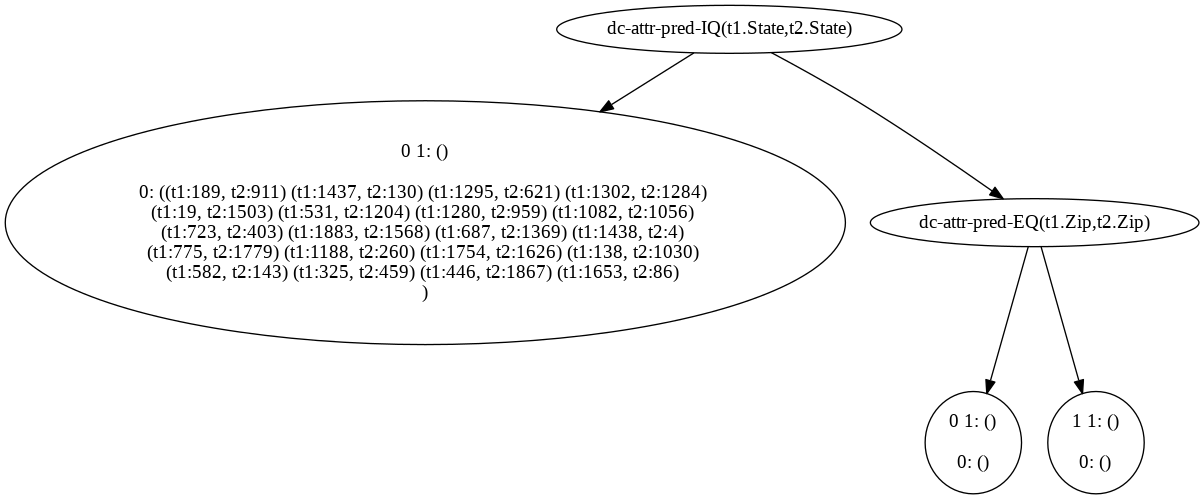



../../rbbm_src/experiment_results_folders/dc_test_case1004/20231004215011/tree_5_dot_file


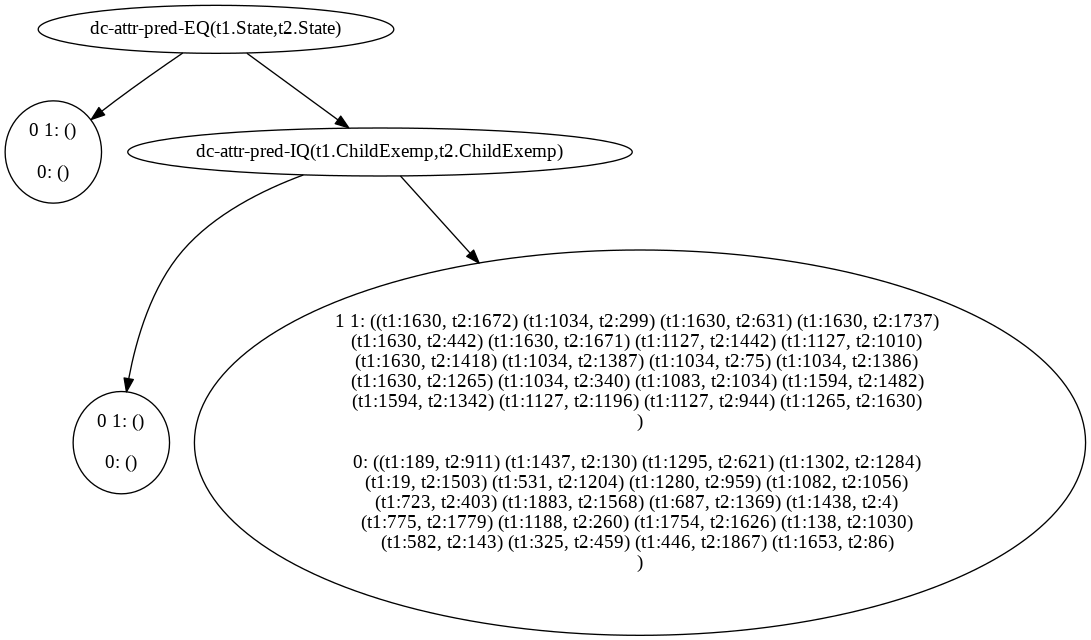



../../rbbm_src/experiment_results_folders/dc_test_case1004/20231004215011/tree_6_dot_file


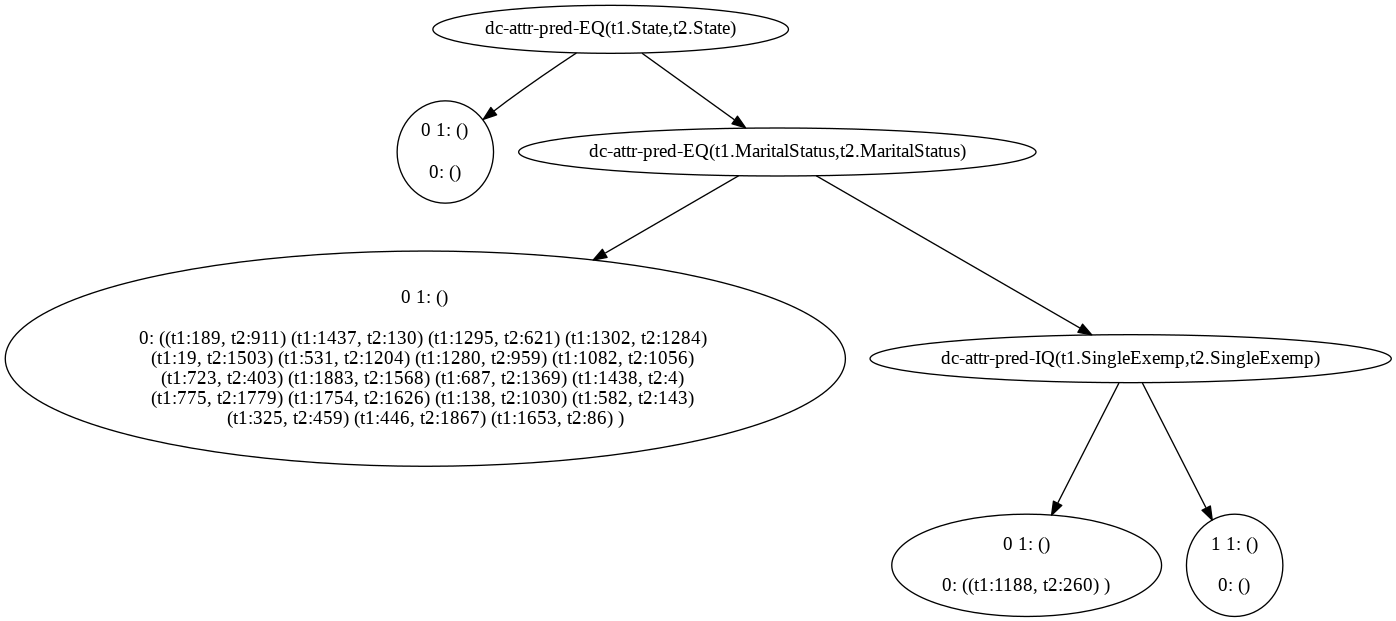



../../rbbm_src/experiment_results_folders/dc_test_case1004/20231004215011/tree_7_dot_file


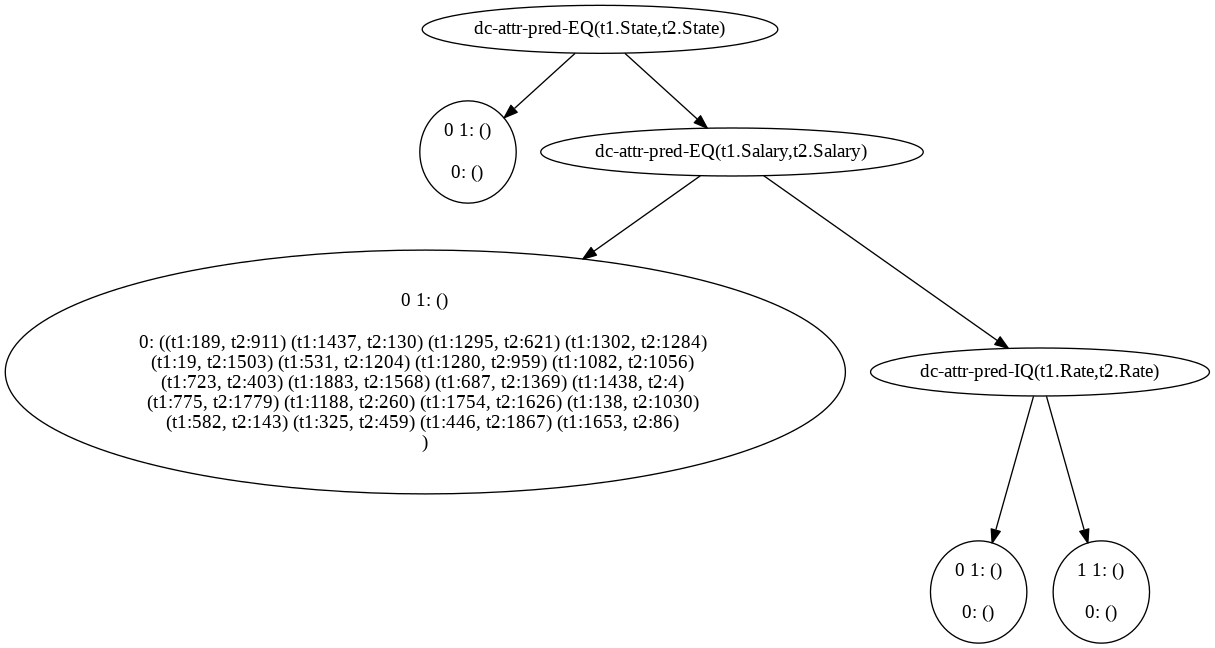



../../rbbm_src/experiment_results_folders/dc_test_case1004/20231004215104/
../../rbbm_src/experiment_results_folders/dc_test_case1004/20231004215104/tree_1_dot_file


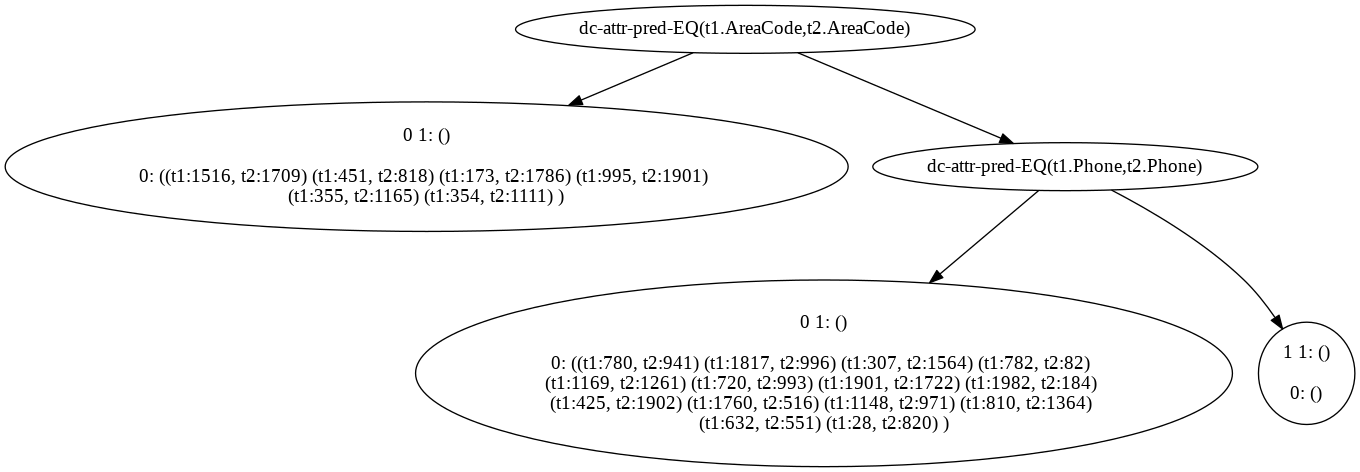



../../rbbm_src/experiment_results_folders/dc_test_case1004/20231004215104/tree_2_dot_file


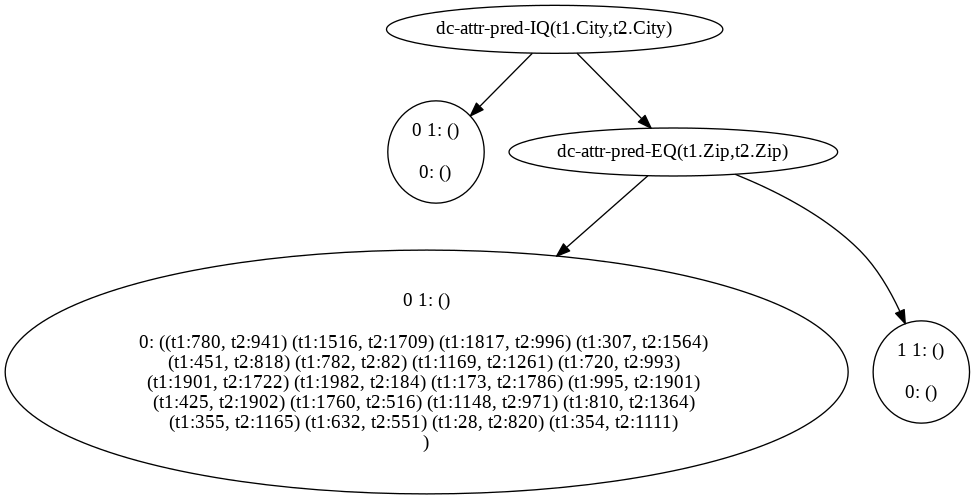



../../rbbm_src/experiment_results_folders/dc_test_case1004/20231004215104/tree_3_dot_file


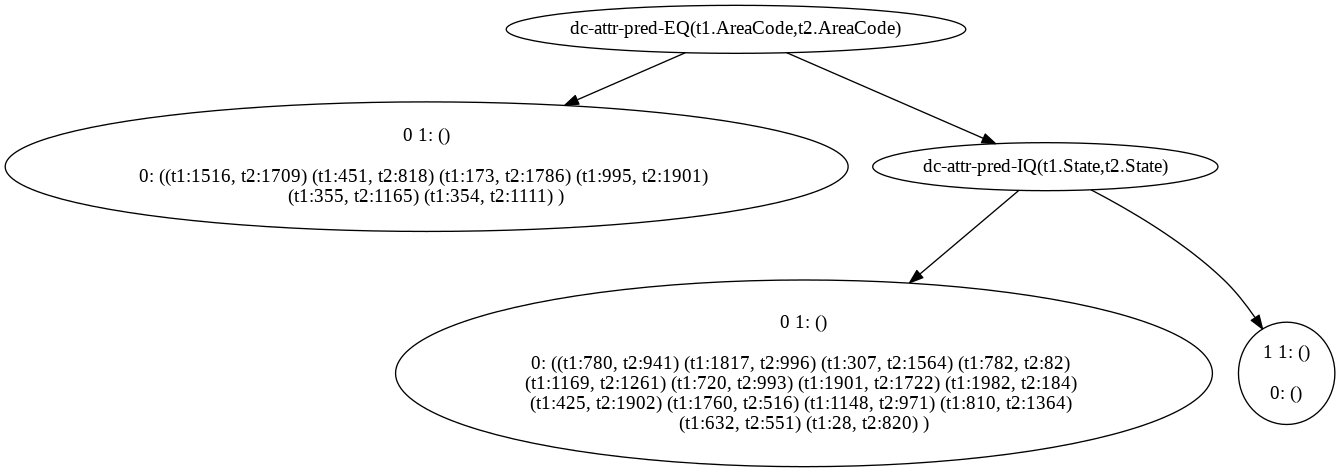



../../rbbm_src/experiment_results_folders/dc_test_case1004/20231004215104/tree_4_dot_file


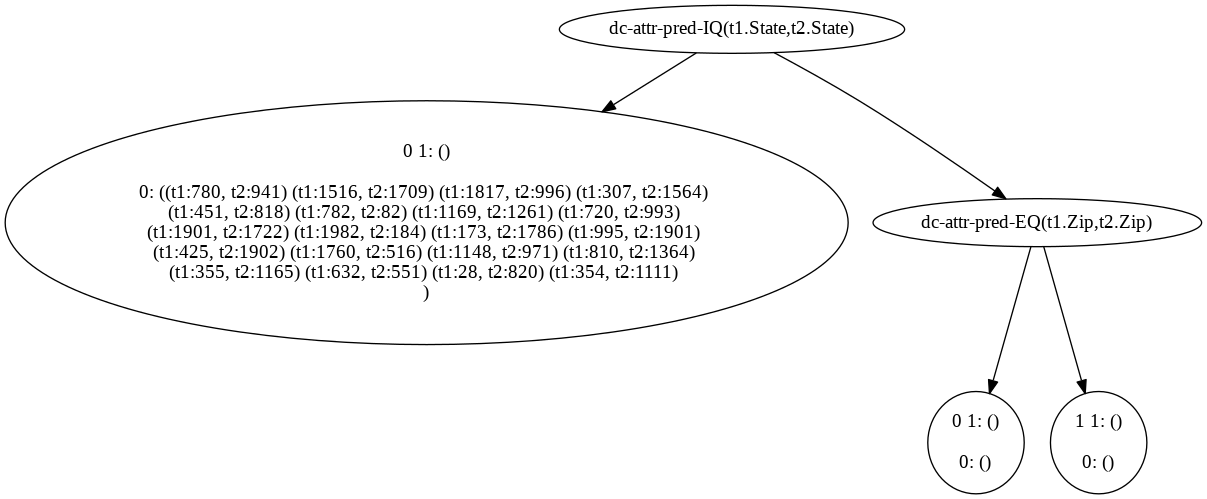



../../rbbm_src/experiment_results_folders/dc_test_case1004/20231004215104/tree_5_dot_file


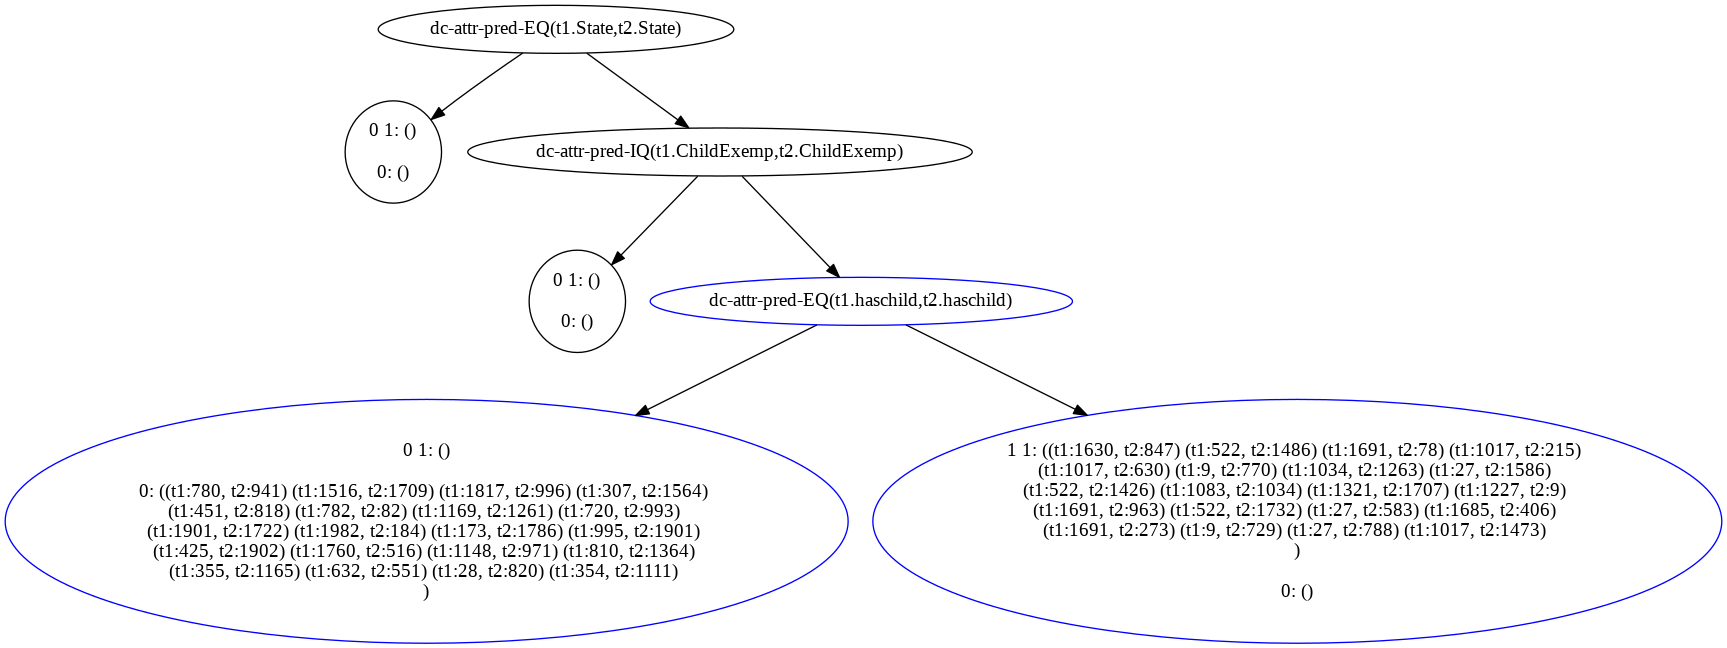



../../rbbm_src/experiment_results_folders/dc_test_case1004/20231004215104/tree_6_dot_file


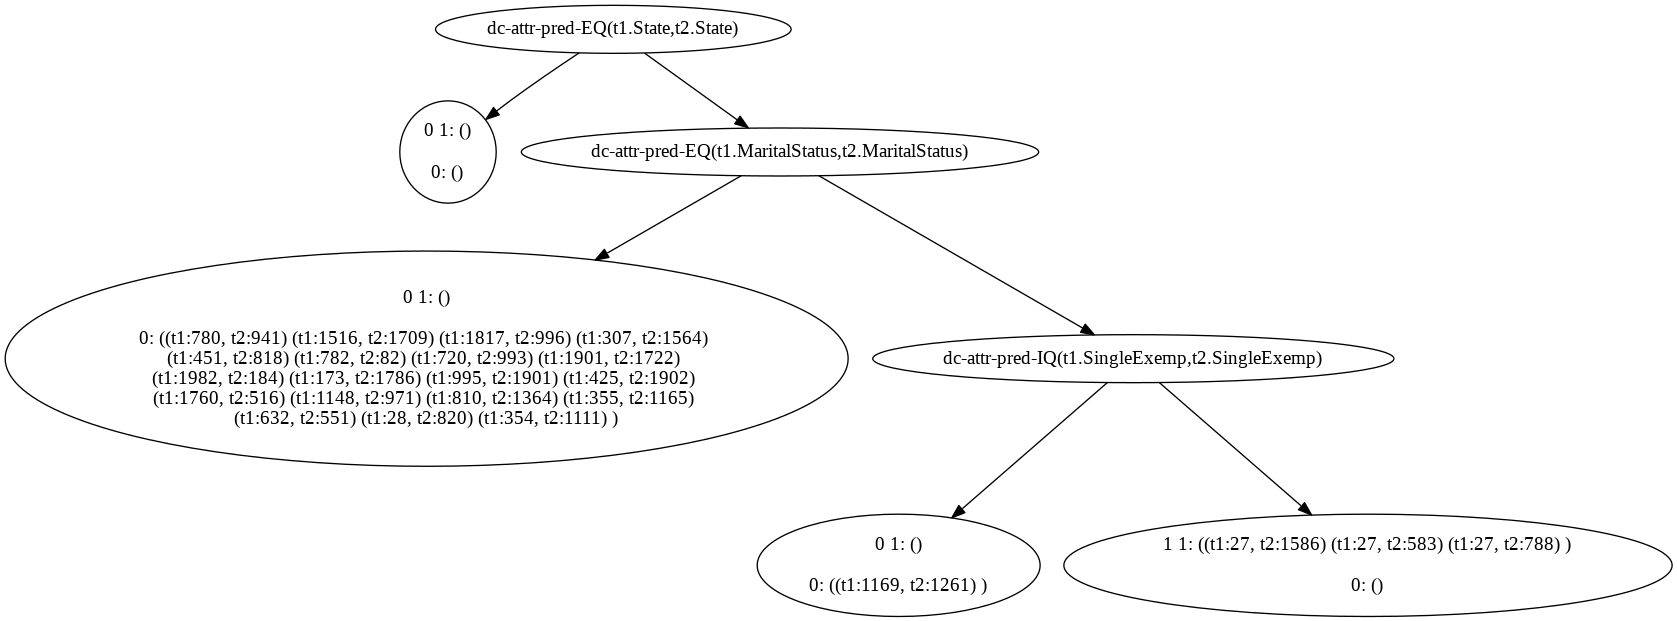



../../rbbm_src/experiment_results_folders/dc_test_case1004/20231004215104/tree_7_dot_file


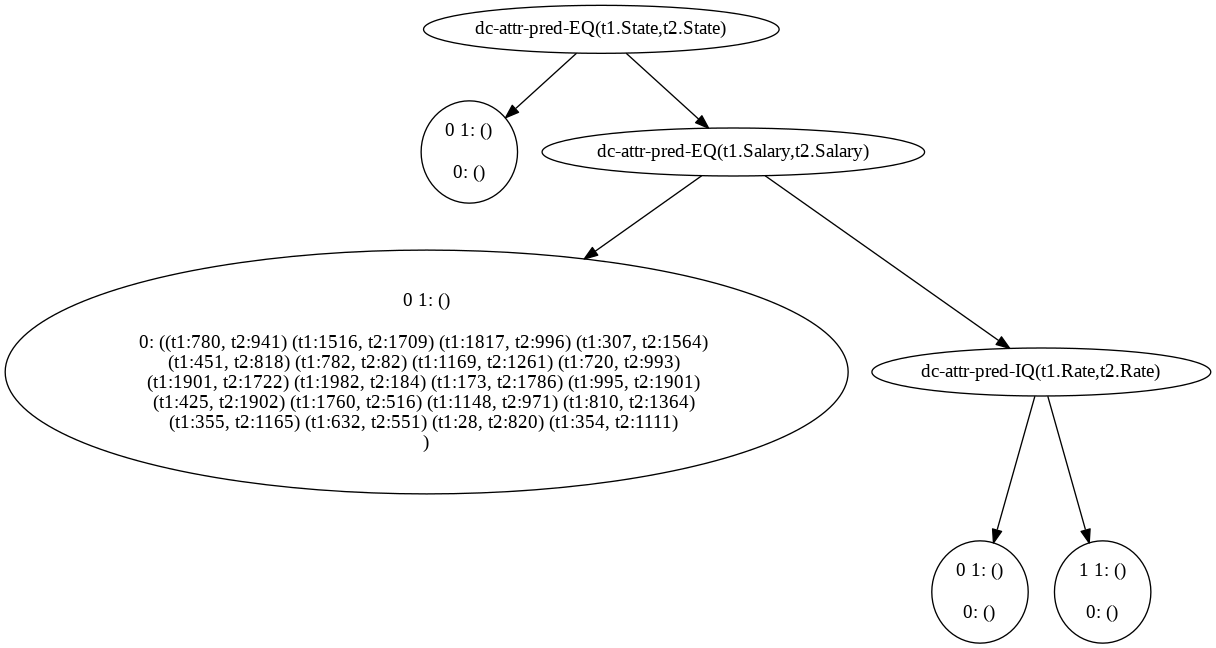



../../rbbm_src/experiment_results_folders/dc_test_case1004/20231004215139/
../../rbbm_src/experiment_results_folders/dc_test_case1004/20231004215139/tree_1_dot_file


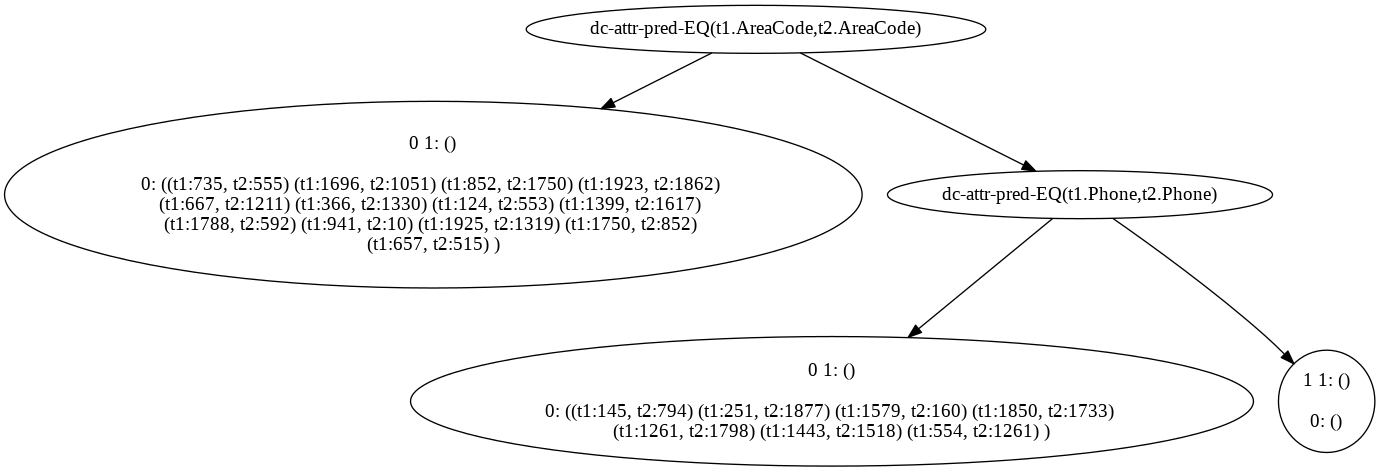



../../rbbm_src/experiment_results_folders/dc_test_case1004/20231004215139/tree_2_dot_file


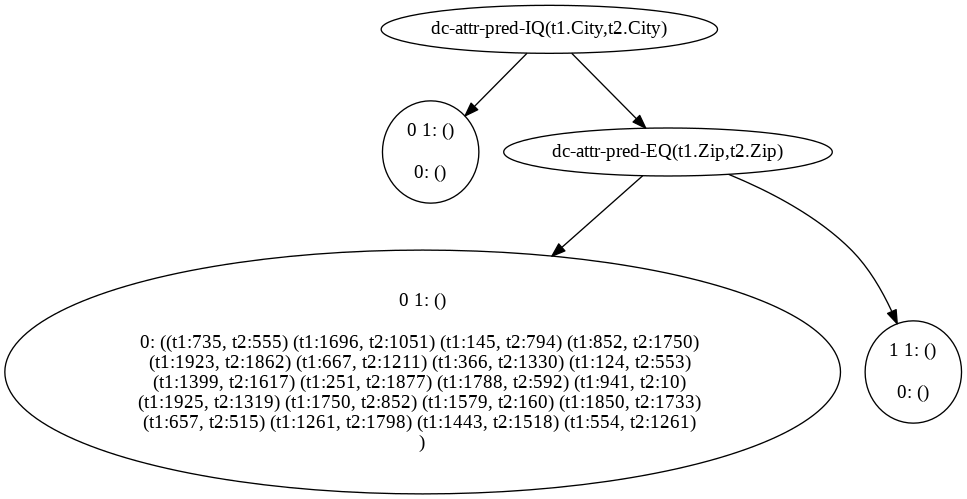



../../rbbm_src/experiment_results_folders/dc_test_case1004/20231004215139/tree_3_dot_file


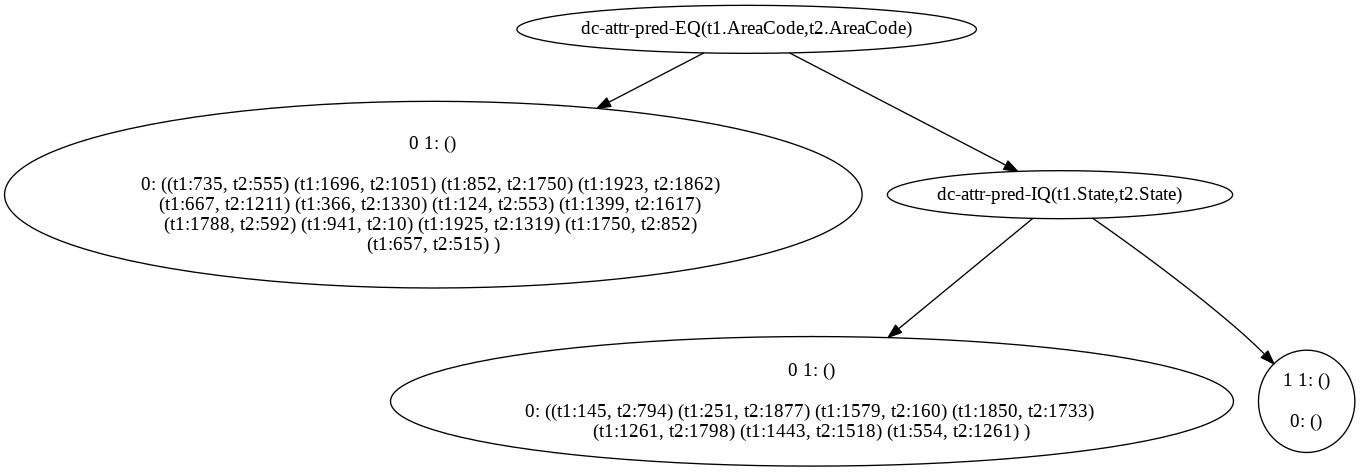



../../rbbm_src/experiment_results_folders/dc_test_case1004/20231004215139/tree_4_dot_file


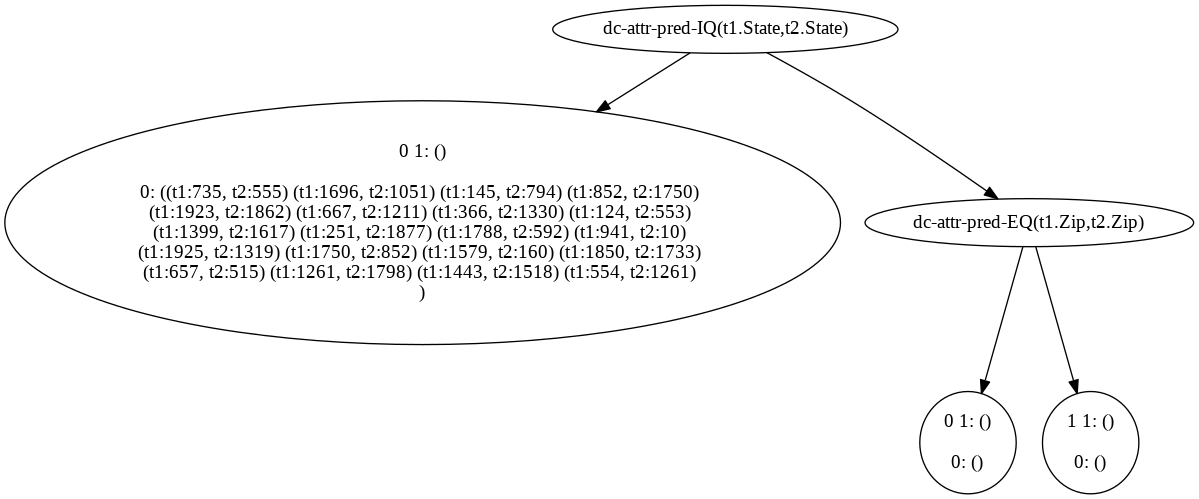



../../rbbm_src/experiment_results_folders/dc_test_case1004/20231004215139/tree_5_dot_file


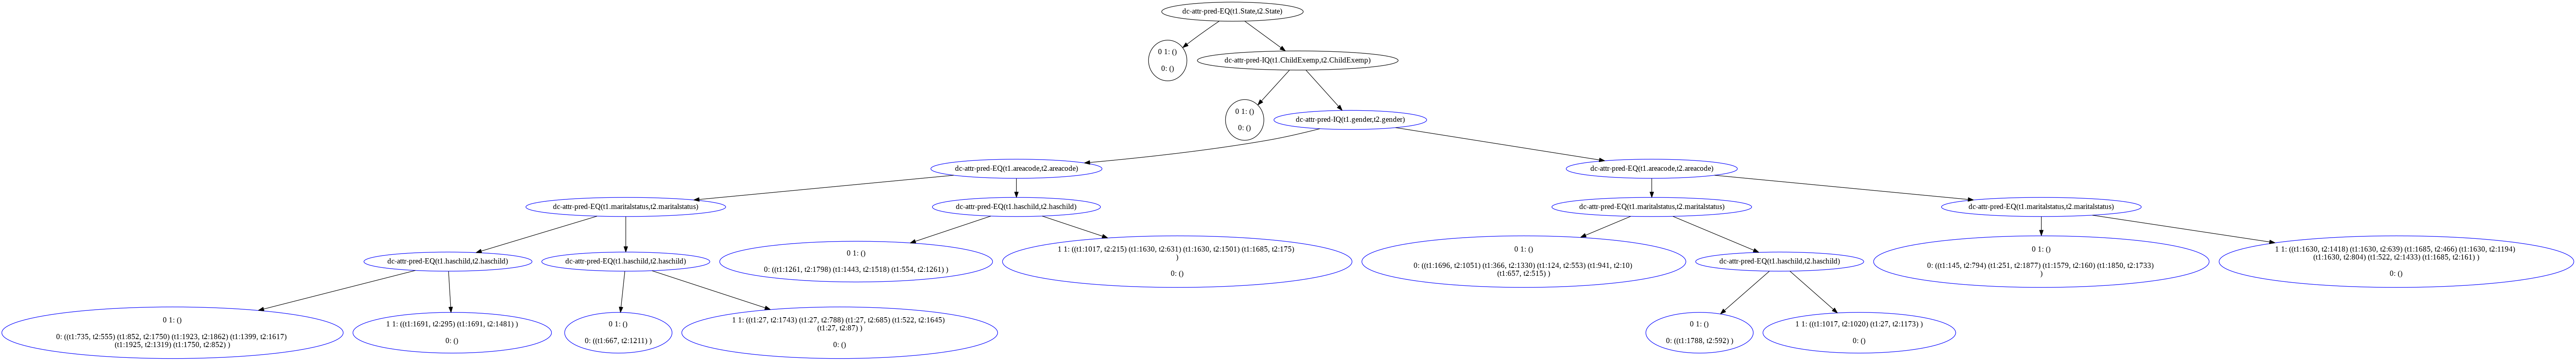



../../rbbm_src/experiment_results_folders/dc_test_case1004/20231004215139/tree_6_dot_file


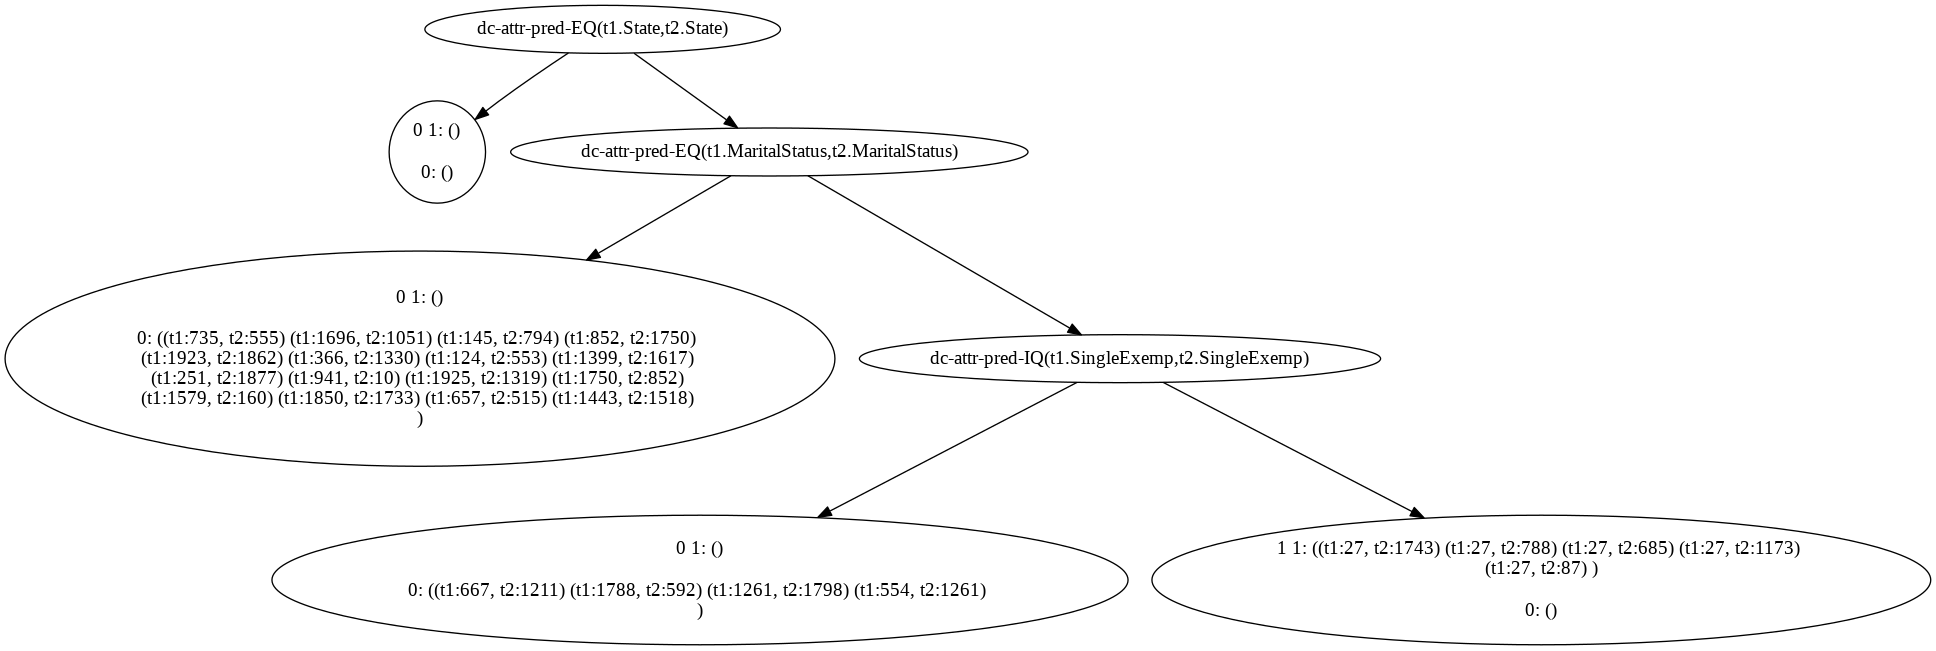



../../rbbm_src/experiment_results_folders/dc_test_case1004/20231004215139/tree_7_dot_file


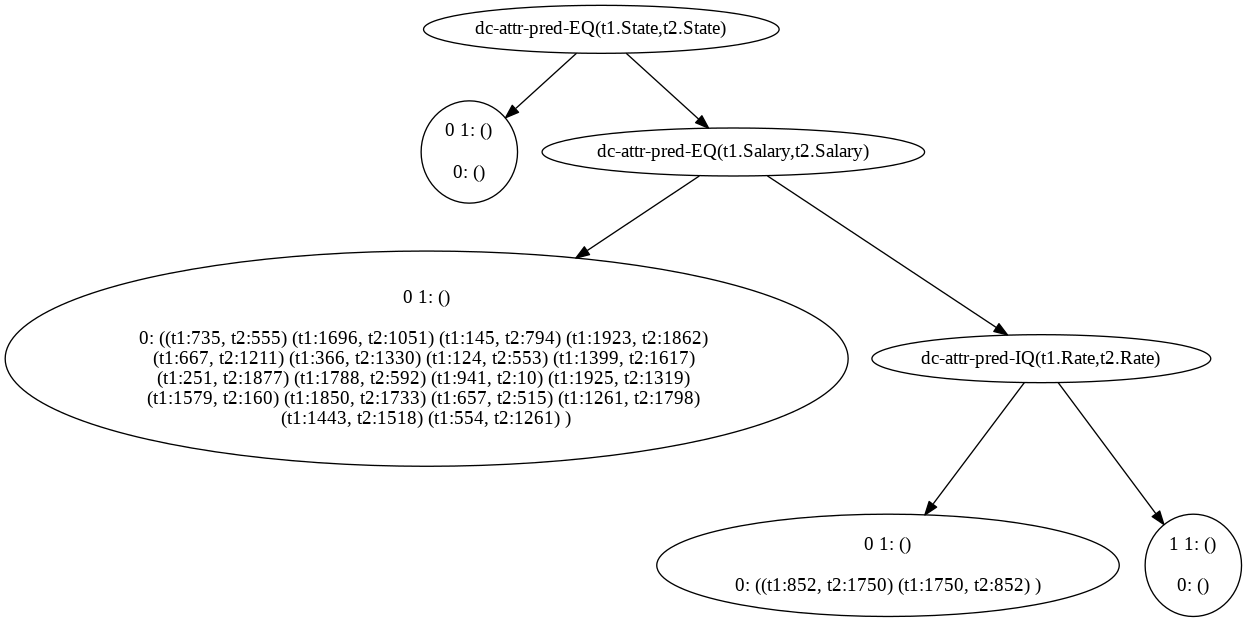

In [18]:
for f in files:
    show_trees(f+'/')

../../rbbm_src/experiment_results_folders/dc_test_case1004/20231004213451/
../../rbbm_src/experiment_results_folders/dc_test_case1004/20231004213451/tree_1_dot_file


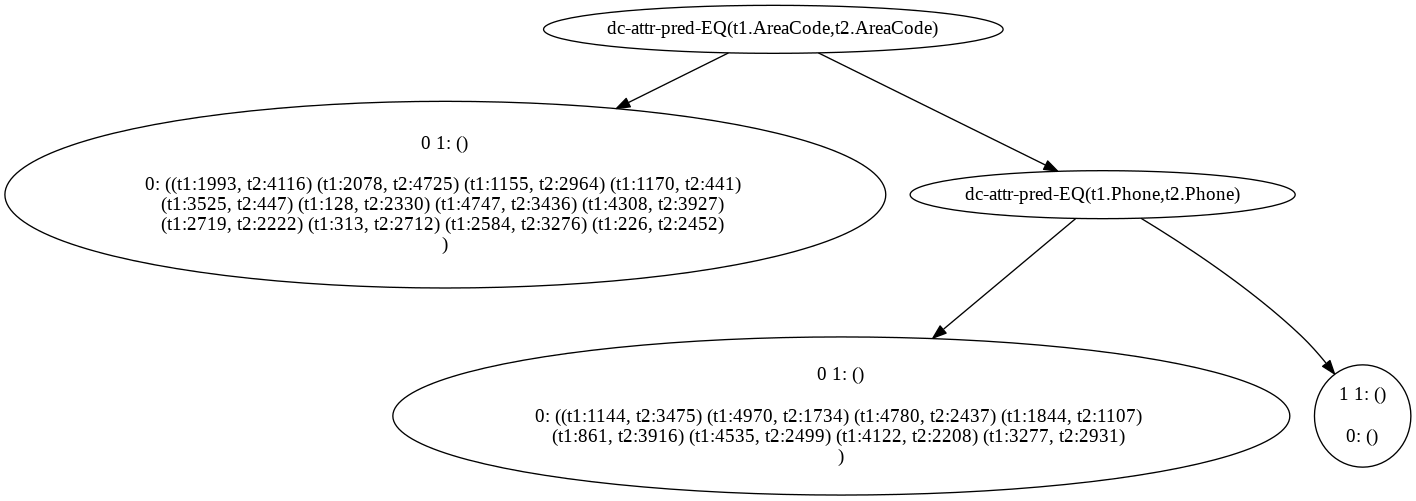



../../rbbm_src/experiment_results_folders/dc_test_case1004/20231004213451/tree_2_dot_file


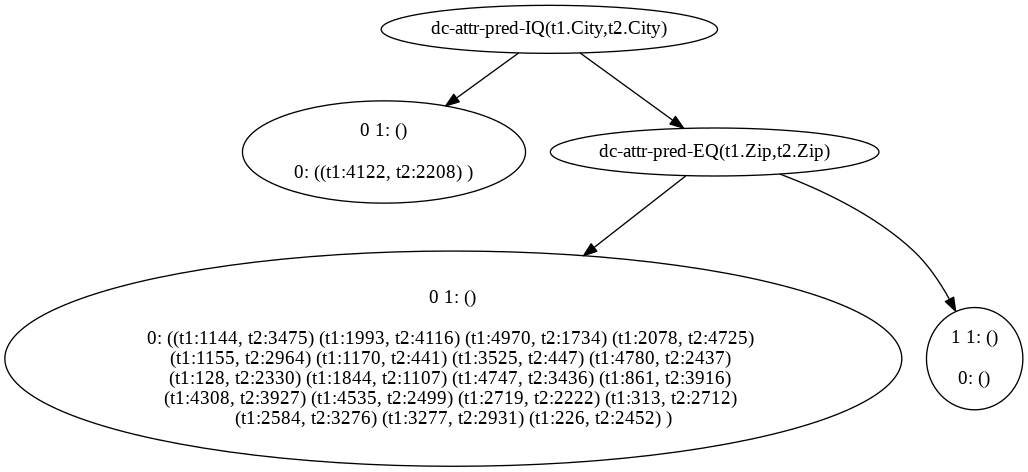



../../rbbm_src/experiment_results_folders/dc_test_case1004/20231004213451/tree_3_dot_file


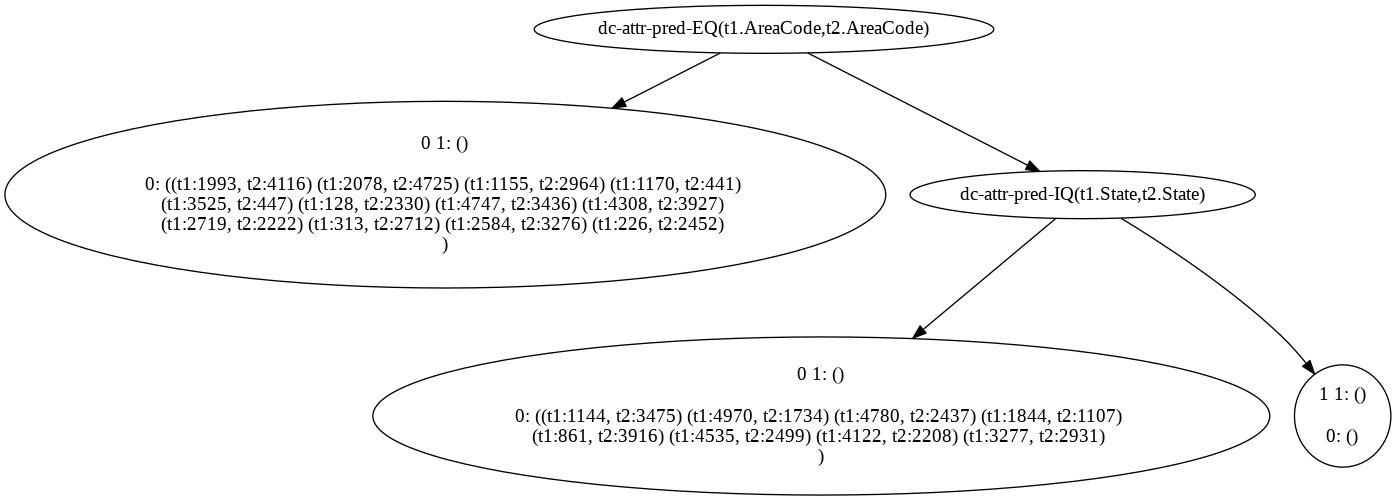



../../rbbm_src/experiment_results_folders/dc_test_case1004/20231004213451/tree_4_dot_file


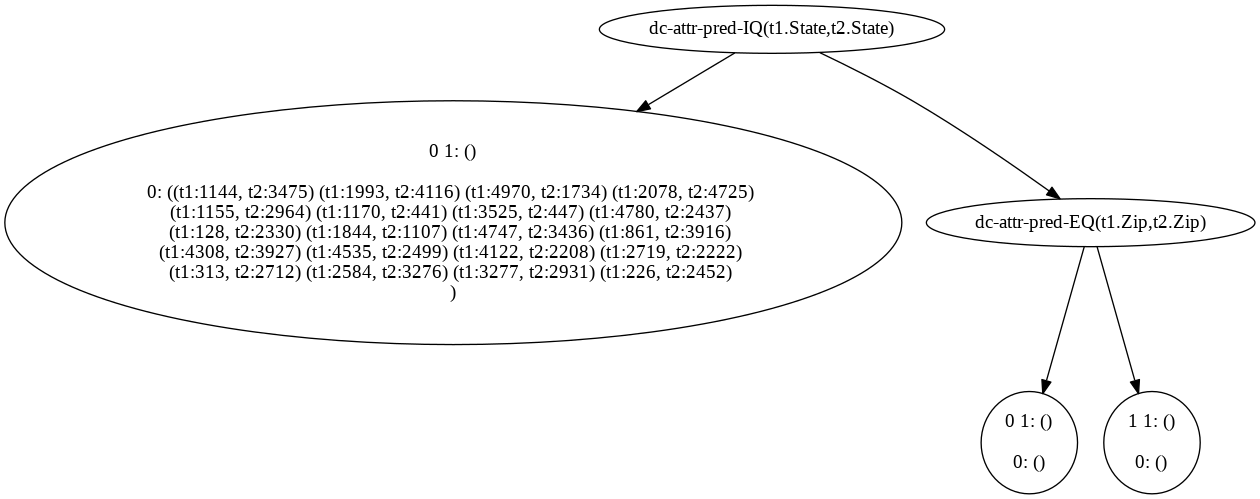



../../rbbm_src/experiment_results_folders/dc_test_case1004/20231004213451/tree_5_dot_file


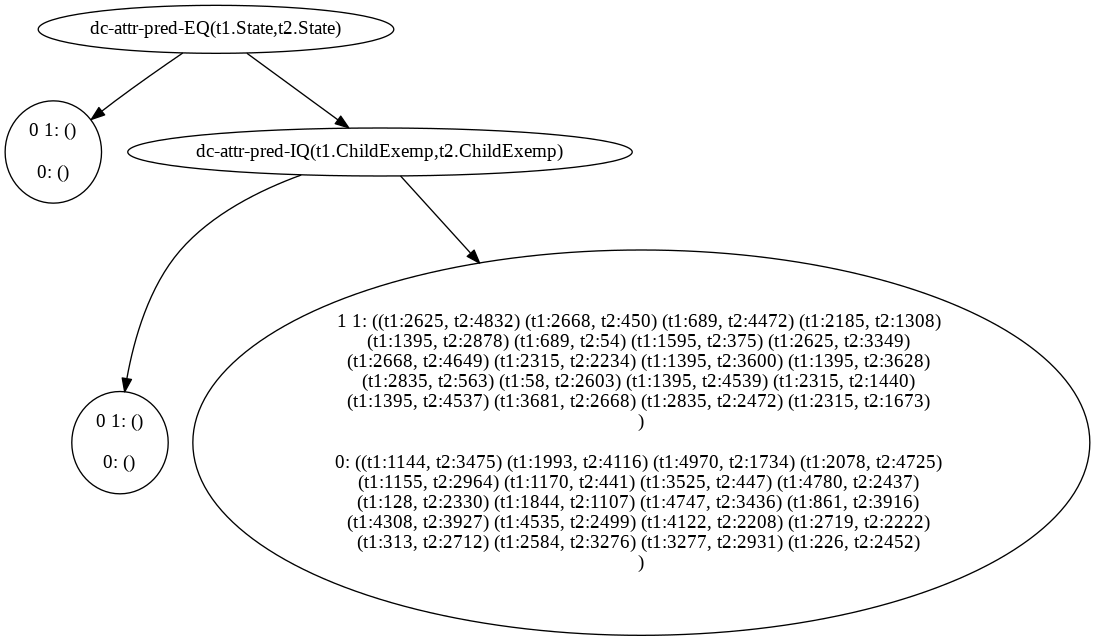



../../rbbm_src/experiment_results_folders/dc_test_case1004/20231004213451/tree_6_dot_file


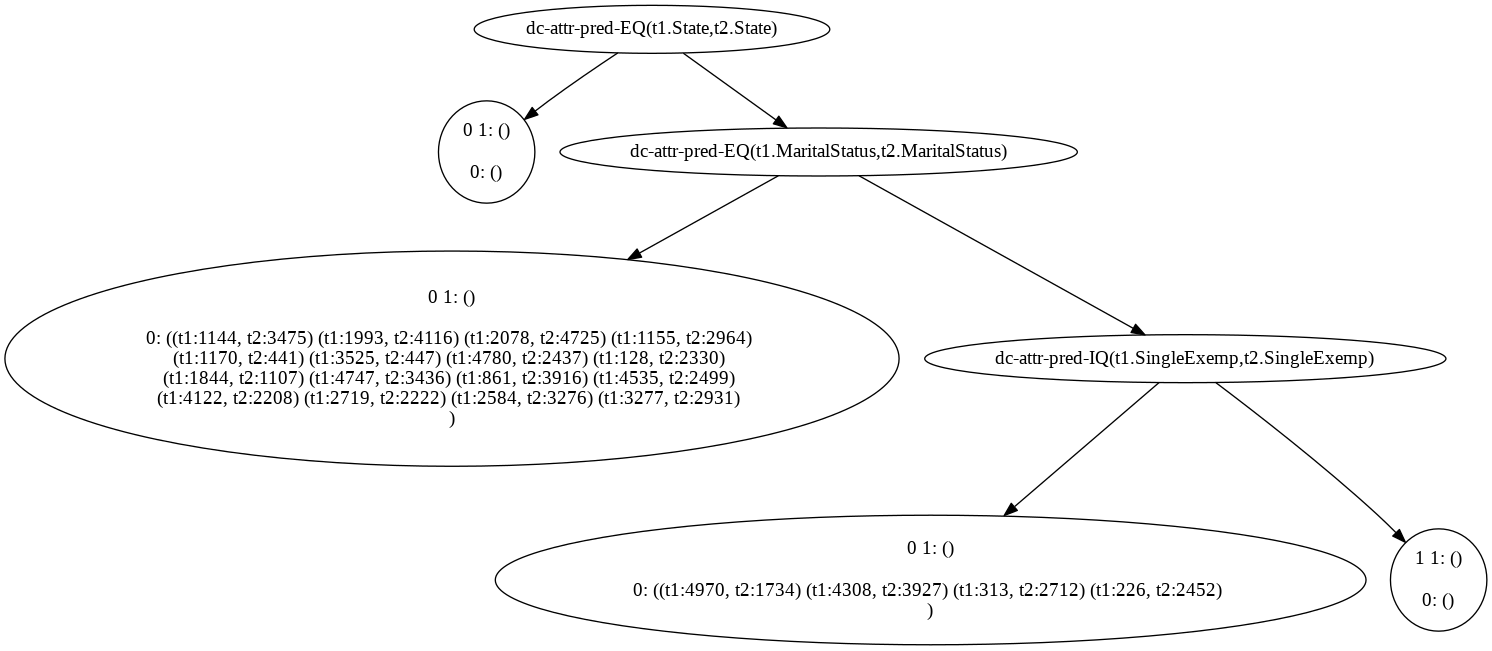



../../rbbm_src/experiment_results_folders/dc_test_case1004/20231004213451/tree_7_dot_file


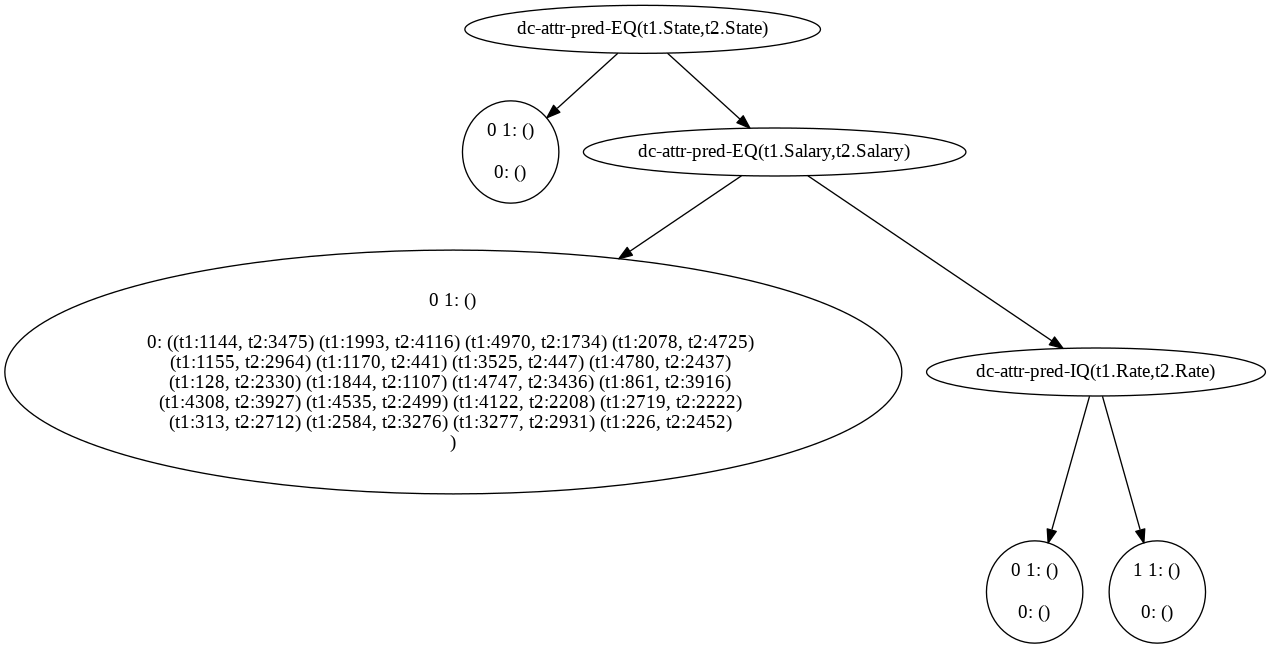

In [7]:
show_trees('../../rbbm_src/experiment_results_folders/dc_test_case1004/20231004213451/')

In [9]:
pd.read_csv('../../rbbm_src/experiment_results_folders/dc_test_case1004/20231004213451/user_input.csv')

,fname,lname,gender,areacode,phone,city,state,zip,maritalstatus,haschild,salary,rate,singleexemp,marriedexemp,childexemp,_tid_,is_dirty,type
0,Baosheng,Pracklein,M,419,1000022,CUYAHOGA FALLS,OH,44221,M,N,80500,3.218213,0,2600,0,128,False,complaint
1,Hiroyuji,Giannotti,M,740,1001352,CUYAHOGA FALLS,OH,44221,S,Y,50500,2.222367,1300,0,1300,226,False,complaint
2,Nicolau,Postmus,M,417,1001693,GRAY SUMMIT,MO,63039,M,Y,64000,6.000000,0,4200,1200,313,False,complaint
3,Marianthi,Ozturk,M,802,1009273,EDEN MILLS,VT,5653,S,Y,16000,3.600000,3300,0,3300,861,False,complaint
4,Rajendran,Keaton,F,270,1000747,FLAT LICK,KY,40935,S,Y,16000,2.722222,20,0,20,1144,False,complaint
5,Kunle,Suhnel,F,251,1003153,BURNWELL,AL,35038,M,N,94000,5.000000,0,3000,0,1155,False,complaint
6,Adriana,Nytro,F,276,1002865,GORDONSVILLE,VA,22942,S,Y,76500,5.750000,900,0,900,1170,False,complaint
7,Rejane,Bladen,F,971,1001968,JEFFERSON,OR,97352,S,Y,27500,9.000000,159,0,159,1844,False,complaint
8,Insung,Sluizer,F,434,1002118,ASHBURN,VA,20148,M,N,45000,5.750000,0,1800,0,1993,False,complaint
9,Shizuo,Lokketangen,F,651,1000400,NEW RICHLAND,MN,56072,S,Y,92500,7.850000,3300,0,3300,2078,False,complaint
